## Import libraries

In [1]:
import numpy as np
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

### Loading datasets

In [3]:
kc_house_data = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
wk3_kc_house_train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype = dtype_dict)
wk3_kc_house_test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype = dtype_dict)
wk3_kc_house_valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype = dtype_dict)
wk3_kc_house_set_1_data = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype = dtype_dict)
wk3_kc_house_set_2_data = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype = dtype_dict)
wk3_kc_house_set_3_data = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype = dtype_dict)
wk3_kc_house_set_4_data = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype = dtype_dict)

### Adding polynomial features

In [24]:
def polynomial_sframe(feature, degree):
    """
        feature -> np.array()
        degree  -> integer
    """
    poly_df = pd.DataFrame({'power_1' : feature})
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_df[name] = np.power(feature, power)
    return poly_df

In [25]:
sales = kc_house_data.sort(['sqft_living','price'])

In [26]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [27]:
poly1_data.head()

,power_1,price
19452,290,142000
15381,370,276000
860,380,245000
18379,384,265000
4868,390,228000


### Building init linear regression with sklearn

In [28]:
import sklearn.linear_model

In [29]:
model1 = sklearn.linear_model.LinearRegression()
model1.fit(poly1_data[['power_1']], poly1_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

### Plotting in sample predictions

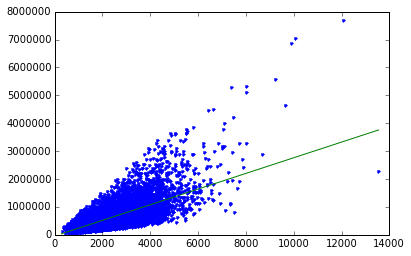

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
         poly1_data['power_1'], model1.predict(poly1_data[['power_1']]),'-')

### Second level degree polynomial

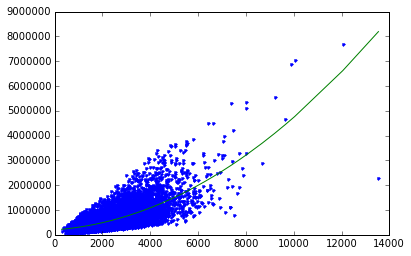

In [33]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']
model2 = sklearn.linear_model.LinearRegression()
model2.fit(poly2_data[['power_1', 'power_2']], poly2_data['price'])
plt.plot(poly2_data['power_1'], poly2_data['price'], '.',
         poly2_data['power_1'], model2.predict(poly2_data[['power_1', 'power_2']]),'-')

### Third level degree polynomial

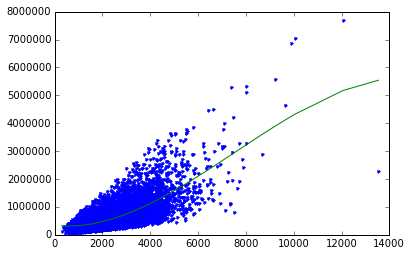

In [36]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
model3 = sklearn.linear_model.LinearRegression()
model3.fit(poly3_data[['power_1', 'power_2', 'power_3']], poly3_data['price'])
plt.plot(poly3_data['power_1'], poly3_data['price'], '.',
         poly3_data['power_1'], model3.predict(poly3_data[['power_1', 'power_2', 'power_3']]),'-')

### Try 15th degree polynomial

[  4.56404164e-91   1.42712173e-50   7.68159926e-56   5.37872327e-60
   1.04545560e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


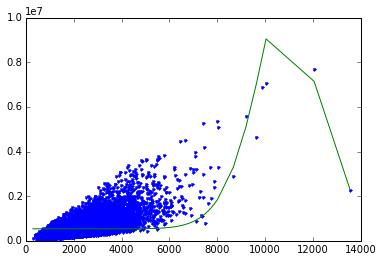

In [41]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']
model15 = sklearn.linear_model.LinearRegression()
model15.fit(poly15_data.drop('price', 1, inplace = False), poly15_data['price'])

print model15.coef_

plt.plot(poly15_data['power_1'], poly15_data['price'], '.',
         poly15_data['power_1'], model15.predict(poly15_data.drop('price', 1, inplace = False)),'-')

### Creating new subsets

In [45]:
set_1 = wk3_kc_house_set_1_data
set_2 = wk3_kc_house_set_2_data
set_3 = wk3_kc_house_set_3_data
set_4 = wk3_kc_house_set_4_data

def fit15th_order(data):
    poly = polynomial_sframe(data['sqft_living'], 15)
    poly['price'] = data['price']
    model = sklearn.linear_model.LinearRegression()
    model.fit(poly.drop('price', 1, inplace = False), poly['price'])

    print model.coef_

    plt.plot(poly['power_1'], poly['price'], '.',
             poly['power_1'], model.predict(poly.drop('price', 1, inplace = False)),'-')

### Fitting 15th order on set1

[  3.05794168e-90   2.21229718e-49   6.14919047e-55   3.70645715e-60
  -1.76896679e-74   1.10358334e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]


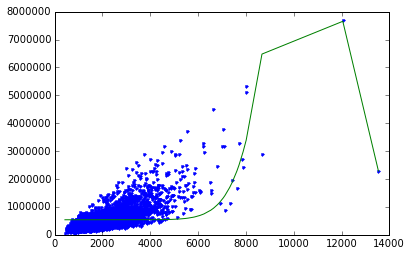

In [46]:
fit15th_order(set_1)

[  2.68007730e-77  -1.28315451e-39   2.29856318e-45   3.90813500e-49
   2.27126043e-53  -8.03782665e-57   3.62841089e-55   1.49807480e-51
   5.73974428e-48   1.95158330e-44   5.37897035e-41   9.38035527e-38
  -3.62478309e-41   4.63968356e-45  -1.96500469e-49]


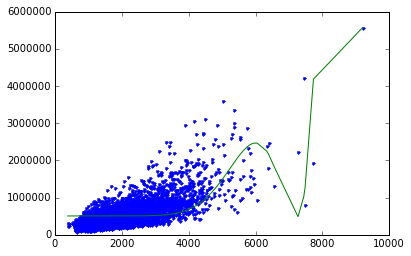

In [47]:
fit15th_order(set_2)

[  2.83751934e-88   1.17220384e-48   1.05176250e-55   1.55068038e-59
   1.64169385e-72   4.27894908e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]


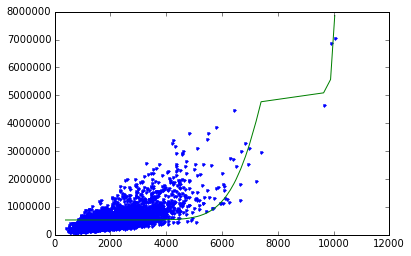

In [48]:
fit15th_order(set_3)

[  1.37062038e-76  -7.34880850e-40  -4.26691045e-44  -3.79757873e-49
  -1.08322540e-53   2.33358797e-57   1.27051232e-54   4.87799087e-51
   1.73524692e-47   5.46982656e-44   1.39568453e-40   2.25011157e-37
  -9.43820714e-41   1.31553951e-44  -6.09071716e-49]


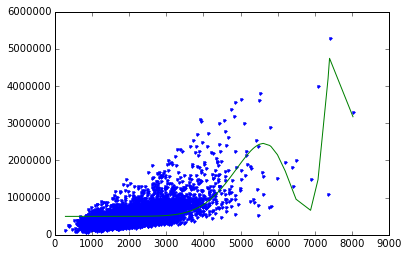

In [49]:
fit15th_order(set_4)

##  Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?

In [50]:
print False

False


## Quiz Question: True/False the plotted fitted lines look the same in all four plots

In [51]:
print False

False


## Loading train test valid datasets

In [59]:
train = wk3_kc_house_train_data
valid = wk3_kc_house_valid_data
test = wk3_kc_house_test_data


def build_model(data, order):
    poly = polynomial_sframe(data['sqft_living'], order)
    poly['price'] = data['price']
    model = sklearn.linear_model.LinearRegression()
    model.fit(poly.drop('price', 1, inplace = False), poly['price'])

    return (model, order)

def compute_test_rss(tup, test):
    model, order = tup
    poly = polynomial_sframe(test['sqft_living'], order)
    preds = model.predict(poly)
    residuals = np.power(preds - test['price'], 2)
    rss = sum(residuals)
    return (rss, order)
    
    

In [60]:
list_models = [build_model(train, i) for i in range(1,16)]

In [66]:
rss_models = [compute_test_rss(tup, valid) for tup in list_models]

In [67]:
print rss_models

[(629097886299587.38, 1), (623955062706519.38, 2), (625820280251478.75, 3), (629987339659527.12, 4), (628258901688771.0, 5), (566268584232998.62, 6), (1073845785969256.6, 7), (7087540281659670.0, 8), (45313670782729208.0, 9), (2.472123773406081e+17, 10), (1.1932408663628006e+18, 11), (5.2732685402450688e+18, 12), (7.6162300213416781e+17, 13), (2.2975609249159757e+18, 14), (6.9550380980938394e+18, 15)]


In [68]:
best = reduce(lambda a,b : a if a[0] < b[0] else b, rss_models)
print best

(566268584232998.62, 6)


### On test data

In [69]:
rss_models = [compute_test_rss(tup, test) for tup in list_models]
best = reduce(lambda a,b : a if a[0] < b[0] else b, rss_models)
print best

(133047306237833.56, 7)


In [70]:
print rss_models

[(142347931358638.81, 1), (135542039274080.34, 2), (135585996079048.95, 3), (135382681471861.41, 4), (135496248109196.84, 5), (135225109698298.17, 6), (133047306237833.56, 7), (134874017358913.98, 8), (145663370772171.88, 9), (163716118834467.5, 10), (184494571159443.72, 11), (204231933695621.34, 12), (269960927584837.38, 13), (274049430547166.62, 14), (276693705523359.91, 15)]
